#📌 Extracción

#🔧 Transformación

In [1]:
import pandas as pd
url= "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json"
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#📊 Carga y análisis

✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.

In [2]:
# Explorar las columnas del dataset y verificar sus tipos de datos.
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# Consultar el diccionario para comprender mejor el significado de las variables.
#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente


In [16]:
# Identificar las columnas más relevantes para el análisis de evasión.
import pandas as pd

# Supongamos que tu DataFrame es df
# Expandir columnas que tienen diccionarios

# Expansión de "customer"
customer_df = df["customer"].apply(pd.Series)

# Expansión de "phone"
phone_df = df["phone"].apply(pd.Series)

# Expansión de "internet"
internet_df = df["internet"].apply(pd.Series)

# Expansión de "account"
account_df = df["account"].apply(pd.Series)



# Combinar todo en un solo DataFrame
df_exp = pd.concat(
    [df.drop(["customer", "phone", "internet", "account"], axis=1),
     customer_df, phone_df, internet_df, account_df],
    axis=1
)


df_exp.head()




,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [17]:
df_exp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [19]:
import pandas as pd

# Expandir la columna Charges en dos
charges_df = df_exp["Charges"].apply(pd.Series)

# Renombrar columnas
charges_df = charges_df.rename(columns={"Monthly": "MonthlyCharges", "Total": "TotalCharges"})

# Eliminar la columna original y añadir las nuevas
df_exp = pd.concat([df_exp.drop("Charges", axis=1), charges_df], axis=1)

# Convertir TotalCharges a numérico (porque viene como string en algunos casos)
df_exp["TotalCharges"] = pd.to_numeric(df_exp["TotalCharges"], errors="coerce")




KeyError: 'Charges'

In [21]:
df_exp.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [36]:
df_exp["Cuentas_Diarias"] = df_exp["MonthlyCharges"] / 30

df_exp.sample(10)
df_exp["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [38]:
df_exp["Churn"] = df_exp["Churn"].replace("", "Desconocido")


In [24]:
import pandas as pd
import numpy as np


numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "Cuentas_Diarias"]


desc = df_exp[numeric_cols].describe().T

desc.head()
#tenure: meses de contrato del cliente
#Charges.Monthly: total de todos los servicios del cliente por mes
#Charges.Total: total gastado por el cliente
#cuentas_diarias: charges.monthly/30

,count,mean,std,min,25%,50%,75%,max
tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
TotalCharges,7256.0,2280.634213,2268.632997,18.800000,400.225000,1391.000000,3785.300000,8684.800000
Cuentas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


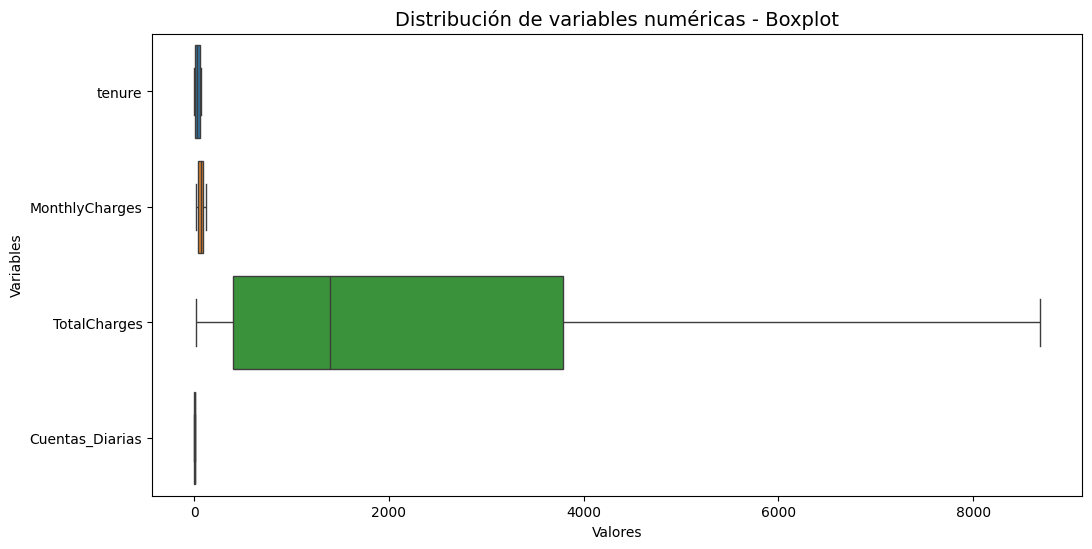

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "Cuentas_Diarias"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exp[numeric_cols],orient="h")
plt.title("Distribución de variables numéricas - Boxplot", fontsize=14)
plt.xlabel("Valores")
plt.ylabel("Variables")
plt.show()

/tmp/ipython-input-1816491888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_exp, x="Churn", palette="tab10")


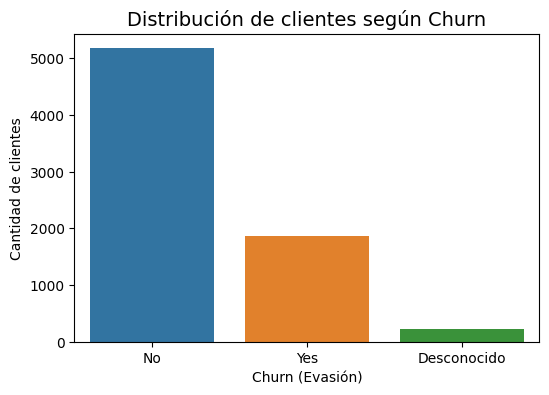

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df_exp, x="Churn", palette="tab10")
plt.title("Distribución de clientes según Churn", fontsize=14)
plt.xlabel("Churn (Evasión)")
plt.ylabel("Cantidad de clientes")
plt.show()


In [31]:
df_exp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


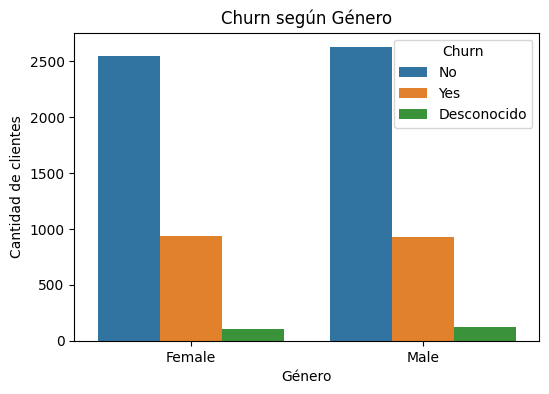

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.countplot(data=df_exp, x="gender", hue="Churn")

plt.title("Churn según Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()

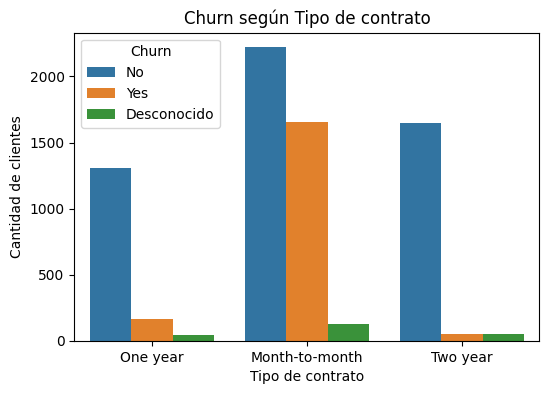

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.countplot(data=df_exp, x="Contract", hue="Churn")

plt.title("Churn según Tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.show()

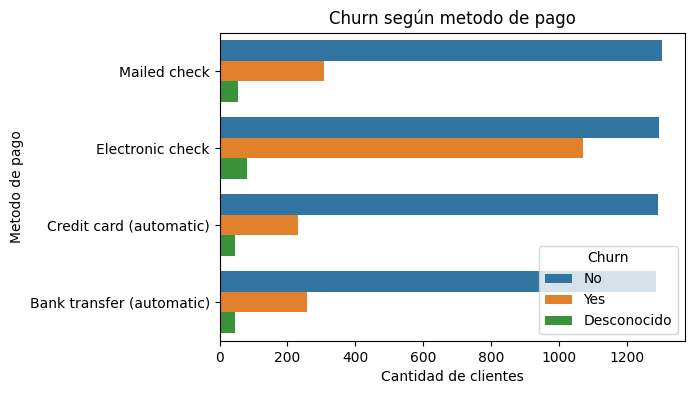

In [51]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.countplot(data=df_exp, y="PaymentMethod", hue="Churn",orient="h")

plt.title("Churn según metodo de pago")
plt.ylabel("Metodo de pago")
plt.xlabel("Cantidad de clientes")
plt.show()

/tmp/ipython-input-327280849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exp, y="Churn", x="TotalCharges", palette="Set2")


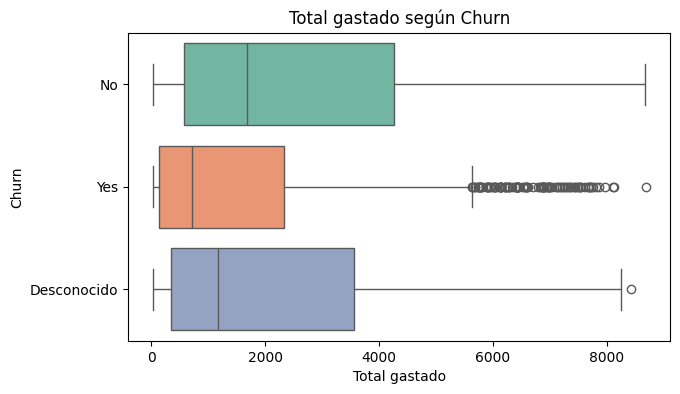

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.boxplot(data=df_exp, y="Churn", x="TotalCharges", palette="Set2")
plt.title("Total gastado según Churn")
plt.xlabel("Total gastado")
plt.ylabel("Churn")
plt.show()

/tmp/ipython-input-550654192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exp, y="Churn", x="tenure", palette="Set2")


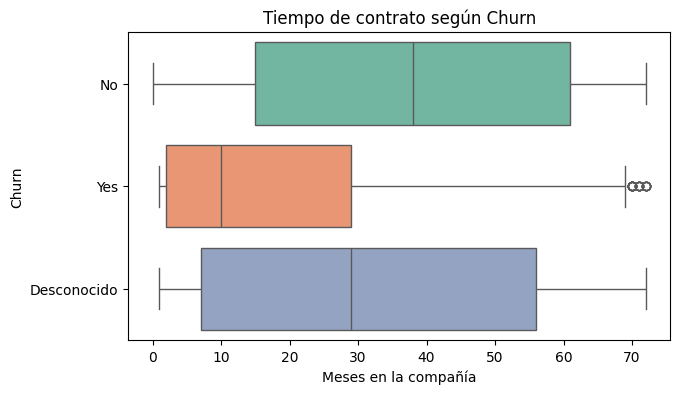

In [49]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df_exp, y="Churn", x="tenure", palette="Set2")
plt.title("Tiempo de contrato según Churn")
plt.xlabel("Meses en la compañía")
plt.ylabel("Churn")
plt.show()

/tmp/ipython-input-1101623956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exp, y="Churn", x="MonthlyCharges", palette="Set2")


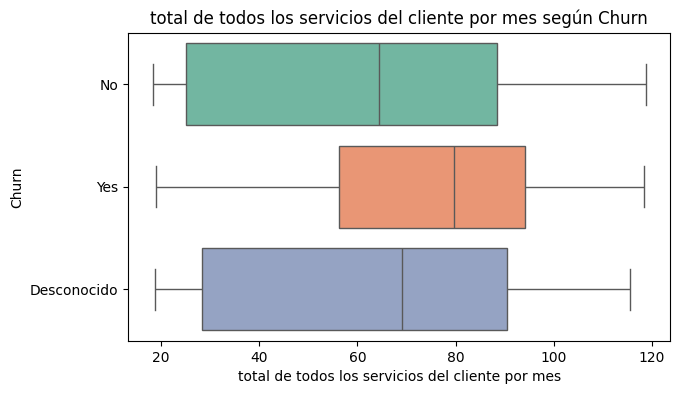

In [53]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df_exp, y="Churn", x="MonthlyCharges", palette="Set2")
plt.title("total de todos los servicios del cliente por mes según Churn")
plt.xlabel("total de todos los servicios del cliente por mes")
plt.ylabel("Churn")
plt.show()

#📄Informe final

##Introduccion
el objetivo de este analisis es  comprender el comportamiento de los clientes de TelecomX que  cancelan el servicio.

## Limpieza y tratamiento de los datos
Se realizo los siguientes pasos para dejar el dataset listo para ser analisado en la plataforma google colba.

1.- Importacion de los datos desde github el archico tenia formato .json
2.   se realizo  apertura de las columnas que estabn en series(CUSTOMER,PHONE,INTERNET, ACCOUNT,CHARGES).
3. se realizo  conversion numerica a las columnas totalCharges y MonthlyCHarges.
4 . Creacion de columna Cuentas diarias, la cual fue calculada "df_exp["Cuentas_Diarias"] = df_exp["MonthlyCharges"] / 30"

5. Se manejaron los datos de la columna churn, dejando estos como desconocidos, ya que desconocemos  si el cliente permanecio en la compañia.



## Analisis exploratorio de datos
Se realizaron disitintos analisos para explorar el comportamiento de los clientes evasores
####1.- Distribucion de evasores, para ver clientes que permanecen vs los que cancelan el servicio
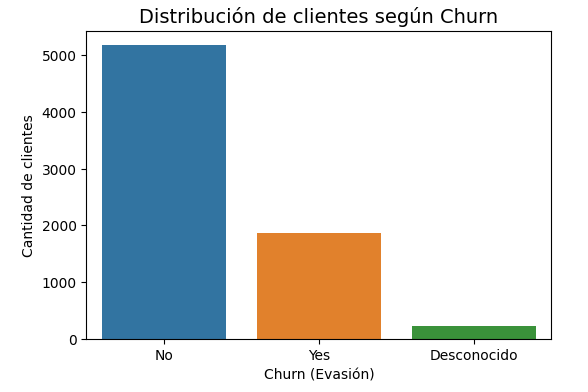


####2. Churn segun variables categoricas.
   - Comparacion de Churn segun genero, tipo de contrato y metodo de pago.
   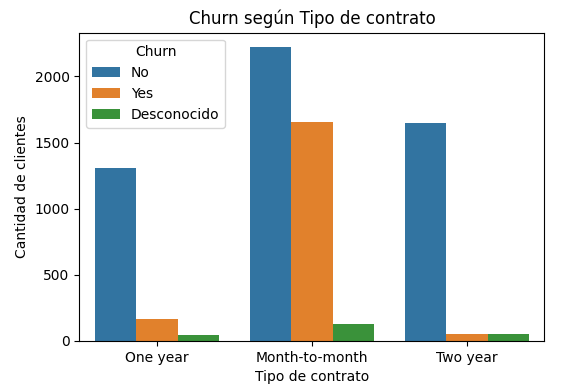
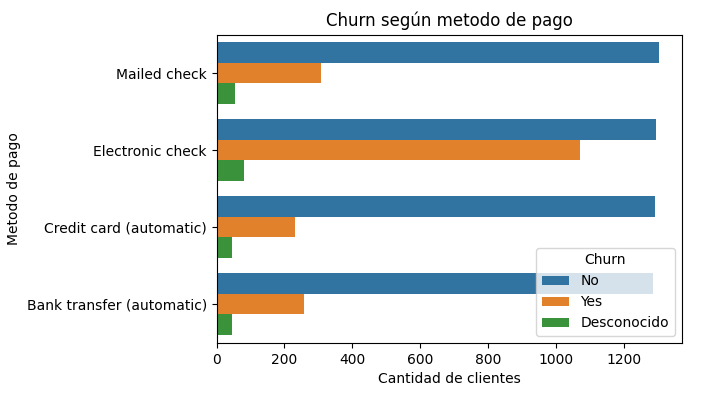

####3.- Distribucion de variables numericas.

  - Se analizaron variables como TotalCharges, Tenure.
  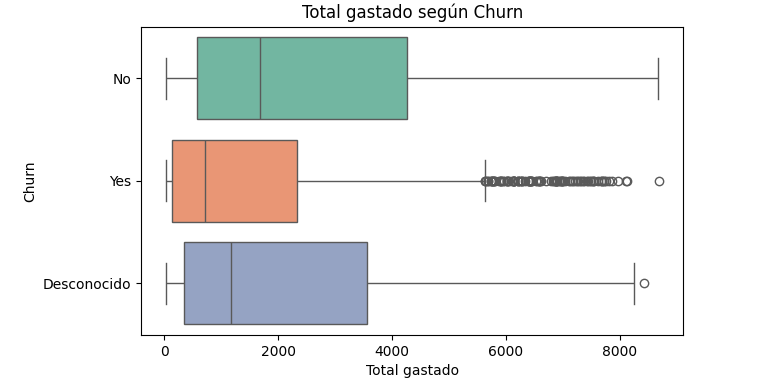

  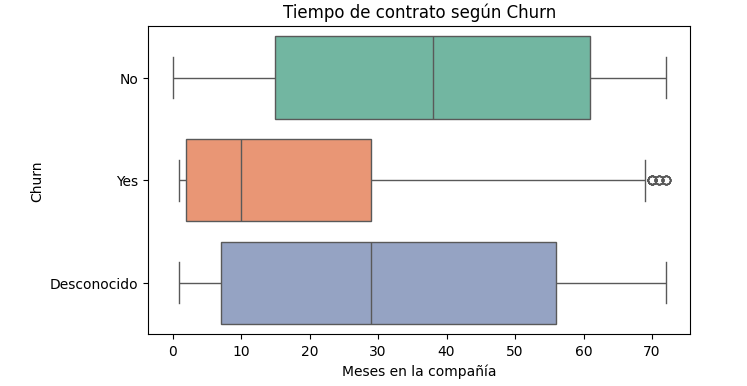

##Conclusion
La mayoria de los clientes permanecen en la compañia, pero existe un grupo importante que cancelaron el servicio.
. Se detecto que los clientes con contrato Month- to-Month , tienn mayor probabilidad de hacer Churn.
. AL realizar analisis por tipo de genero se visualiza que ambas poseen la misma tendencia.
. Clientes con altos cars

###Recomendaciones
1. Acciones de rentencion de clientes con contrato Month-to-month.
2. Incentivar a contratos one year y two year, para reducir Churn.
3. Realizar campañas de fidelizacion de clintes  de baja permanecia.